# Importing libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Reading the Dataset.

In [46]:
df = pd.read_csv("C:/Users/nutha/Desktop/Top_100_Youtube_Channels_2023.csv")

# Describing about the data

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           100 non-null    int64 
 1   Channel Name         100 non-null    object
 2   User Name            100 non-null    object
 3   Subscribers          100 non-null    object
 4   Views                100 non-null    object
 5   Videos               100 non-null    int64 
 6   Channel Description  92 non-null     object
dtypes: int64(2), object(5)
memory usage: 5.6+ KB


In [48]:
df.shape

(100, 7)

In [49]:
df.columns

Index(['Unnamed: 0', 'Channel Name', 'User Name', 'Subscribers', 'Views',
       'Videos', 'Channel Description'],
      dtype='object')

In [50]:
df.head()

,Unnamed: 0,Channel Name,User Name,Subscribers,Views,Videos,Channel Description
0,0,T-Series,@tseries,248M,232B,19430,"'""Music can change the world"". T-Series is Ind..."
1,1,MrBeast,@mrbeast,181M,31B,747,'SUBSCRIBE FOR A COOKIE!\nAccomplishments:\n- ...
2,2,YouTube Movies,YouTube Movies,173M,0,0,"""YouTube's movies destination featuring the la..."
3,3,Cocomelon - Nursery Rhymes,@cocomelon,164M,168B,1001,"'At CoComelon, our primary goal has always bee..."
4,4,SET India,@setindia,161M,151B,118126,'Sony Entertainment Television is one of the l...


In [51]:
df.describe()

,Unnamed: 0,Videos
count,100.000000,100.000000
mean,49.500000,22385.710000
std,29.011492,56191.998844
min,0.000000,0.000000
25%,24.750000,523.750000
50%,49.500000,1467.500000
75%,74.250000,6549.000000
max,99.000000,301612.000000


# Data Cleaning

### Dropping 'channel description' and 'username' columns

In [52]:
df = df.drop(['Channel Description','User Name'],axis = 1)

In [53]:
df

,Unnamed: 0,Channel Name,Subscribers,Views,Videos
0,0,T-Series,248M,232B,19430
1,1,MrBeast,181M,31B,747
2,2,YouTube Movies,173M,0,0
3,3,Cocomelon - Nursery Rhymes,164M,168B,1001
4,4,SET India,161M,151B,118126
...,...,...,...,...,...
95,95,ช่อง One31,38M,27B,119042
96,96,Maria Clara & JP,38M,25B,753
97,97,Jkk Entertainment,37M,16B,222
98,98,ABP NEWS,37M,13B,301612


### removing 'M' from subscribers column and 'B' from views column

In [54]:
df = df.replace({
    'Subscribers':'[a-zA-Z]',
    'Views': '[a-zA-Z]'
},'',regex = True)

In [55]:
df.head()

,Unnamed: 0,Channel Name,Subscribers,Views,Videos
0,0,T-Series,248,232,19430
1,1,MrBeast,181,31,747
2,2,YouTube Movies,173,0,0
3,3,Cocomelon - Nursery Rhymes,164,168,1001
4,4,SET India,161,151,118126


### Checking for any null values in the dataset

In [56]:
df.isnull().sum()

Unnamed: 0      0
Channel Name    0
Subscribers     0
Views           0
Videos          0
dtype: int64

### Changing the datatype of subscribers and views columns to integer

In [57]:
df['Subscribers'] = df['Subscribers'].astype('int64')

In [58]:
df['Views'] = df['Views'].astype('int64')

### Dropping unnamed column which is not useful

In [59]:
df = df.drop(['Unnamed: 0'],axis = 1)


In [60]:
df

,Channel Name,Subscribers,Views,Videos
0,T-Series,248,232,19430
1,MrBeast,181,31,747
2,YouTube Movies,173,0,0
3,Cocomelon - Nursery Rhymes,164,168,1001
4,SET India,161,151,118126
...,...,...,...,...
95,ช่อง One31,38,27,119042
96,Maria Clara & JP,38,25,753
97,Jkk Entertainment,37,16,222
98,ABP NEWS,37,13,301612


### Count of rows which has a value of 0

In [61]:
df[df['Views'] == 0].count()

Channel Name    4
Subscribers     4
Views           4
Videos          4
dtype: int64

### Replacing 0 with null values

In [62]:
df = df.replace(0,np.NaN)

In [63]:
df

,Channel Name,Subscribers,Views,Videos
0,T-Series,248,232.0,19430.0
1,MrBeast,181,31.0,747.0
2,YouTube Movies,173,NaN,NaN
3,Cocomelon - Nursery Rhymes,164,168.0,1001.0
4,SET India,161,151.0,118126.0
...,...,...,...,...
95,ช่อง One31,38,27.0,119042.0
96,Maria Clara & JP,38,25.0,753.0
97,Jkk Entertainment,37,16.0,222.0
98,ABP NEWS,37,13.0,301612.0


### filling the null values with previous values

In [64]:
df = df.fillna(method = 'ffill',limit = 1)

In [65]:
df.rename(columns = {
    'Subscribers':'Subscribers(in Million)',
    'Views' : 'Views(in Billion)'
},inplace = True)

In [66]:
df

,Channel Name,Subscribers(in Million),Views(in Billion),Videos
0,T-Series,248,232.0,19430.0
1,MrBeast,181,31.0,747.0
2,YouTube Movies,173,31.0,747.0
3,Cocomelon - Nursery Rhymes,164,168.0,1001.0
4,SET India,161,151.0,118126.0
...,...,...,...,...
95,ช่อง One31,38,27.0,119042.0
96,Maria Clara & JP,38,25.0,753.0
97,Jkk Entertainment,37,16.0,222.0
98,ABP NEWS,37,13.0,301612.0


# Data Analysis

### Which channel has the highest number of youtubers?

In [67]:
df['Channel Name'][df['Subscribers(in Million)'] == max(df['Subscribers(in Million)'])]

0    T-Series
Name: Channel Name, dtype: object

### Which channel has the highest number of views?

In [68]:
df['Channel Name'][df['Views(in Billion)'] == max(df['Views(in Billion)'])]

0    T-Series
Name: Channel Name, dtype: object

### What is the average views of all the channels

In [69]:
df['Views(in Billion)'].mean()

35.74

### What is the average number of subscribers for the top 100 channels in 2023?

In [70]:
df['Subscribers(in Million)'].mean()

61.39

### Finding relation between subscribers and number of videos

In [71]:
df['Subscribers(in Million)'].corr(df['Videos'])

0.02770805329057868

### By plotting Scatter plot ,

Text(0.5, 1.0, 'Subscribers count vs Number of Videos')

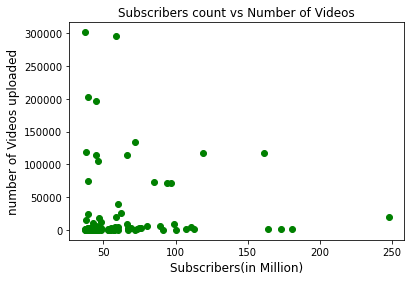

In [72]:
plt.scatter(df['Subscribers(in Million)'],df['Videos'],color = 'green')
plt.xlabel('Subscribers(in Million)',size = 'large')
plt.ylabel('number of Videos uploaded',size = 'large')
plt.title('Subscribers count vs Number of Videos',size = 'large')

### In scatter plot,plots does not fit in a straight line.they are not strongly correlated to each other

### Splitting the data by number of subscribers ranges from 0 to 50M,50M to 100M and so on.. 

In [73]:
subscribers_range = pd.IntervalIndex.from_tuples([(0, 50), (50, 100), (100, 150),(150,200),(200,250)])

In [74]:
df['subscribers_range'] = pd.cut(df['Subscribers(in Million)'], bins=subscribers_range)


In [75]:
df

,Channel Name,Subscribers(in Million),Views(in Billion),Videos,subscribers_range
0,T-Series,248,232.0,19430.0,"(200, 250]"
1,MrBeast,181,31.0,747.0,"(150, 200]"
2,YouTube Movies,173,31.0,747.0,"(150, 200]"
3,Cocomelon - Nursery Rhymes,164,168.0,1001.0,"(150, 200]"
4,SET India,161,151.0,118126.0,"(150, 200]"
...,...,...,...,...,...
95,ช่อง One31,38,27.0,119042.0,"(0, 50]"
96,Maria Clara & JP,38,25.0,753.0,"(0, 50]"
97,Jkk Entertainment,37,16.0,222.0,"(0, 50]"
98,ABP NEWS,37,13.0,301612.0,"(0, 50]"


### Grouping the data by subscribers_range

In [32]:
grouped = df.groupby('subscribers_range')

### Printing the grouped data

In [33]:
for gname,df in grouped:
    print(gname)
    print(df)

(0, 50]
                                     Channel Name  Subscribers(in Million)  \
44                                  Billie Eilish                       48   
45                                    JuegaGerman                       48   
46                                       Shemaroo                       48   
47                                     Get Movies                       48   
48                             SonyMusicIndiaVEVO                       47   
49                                             A4                       47   
50                                        Badabun                       47   
51                                      Bad Bunny                       46   
52                                     Fernanfloo                       46   
53                                    HAR PAL GEO                       46   
54                                      Voot Kids                       46   
55                                    Felipe Neto       

### Describing sum of Subscribers,Views and Videos by Subscribers Range

In [34]:
grouped.sum()

,Subscribers(in Million),Views(in Billion),Videos
subscribers_range,,,
"(0, 50]",2354,1183.0,1258404.0
"(50, 100]",2408,1411.0,907634.0
"(100, 150]",450,367.0,124785.0
"(150, 200]",679,381.0,120621.0
"(200, 250]",248,232.0,19430.0


### Bar Graph for Subscribers range,views and Videos uploaded

<BarContainer object of 5 artists>

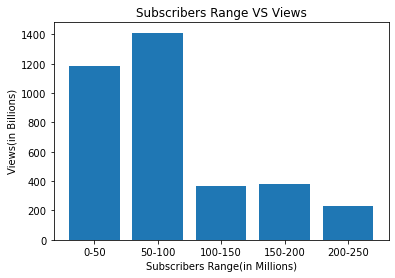

In [35]:
l = ['0-50','50-100','100-150','150-200','200-250']
v = [1183,1411,367,381,232]
plt.title('Subscribers Range VS Views')
plt.xlabel('Subscribers Range(in Millions)')
plt.ylabel('Views(in Billions)')
plt.bar(l,v)

<BarContainer object of 5 artists>

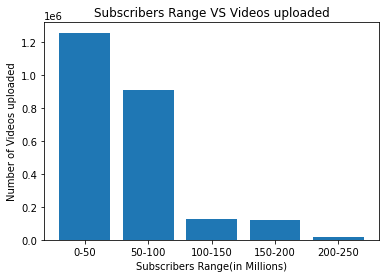

In [36]:
l = ['0-50','50-100','100-150','150-200','200-250']
v = [1258404,907634,124785,120621,19430]
plt.title('Subscribers Range VS Videos uploaded')
plt.xlabel('Subscribers Range(in Millions)')
plt.ylabel('Number of Videos uploaded')
plt.bar(l,v)

## We can conclude that channels which has a subscribers in the range of 0 to 50M have higher range of views and top channel of 2023 is T-Series

In [37]:
import os

In [38]:
os.getcwd()

'C:\\Users\\nutha'

In [39]:
os.chdir('Desktop')

In [40]:
os.getcwd()

'C:\\Users\\nutha\\Desktop'

In [78]:
df.to_excel('top 100 yt channels CleanedData.xlsx',header = True)

In [76]:
df

,Channel Name,Subscribers(in Million),Views(in Billion),Videos,subscribers_range
0,T-Series,248,232.0,19430.0,"(200, 250]"
1,MrBeast,181,31.0,747.0,"(150, 200]"
2,YouTube Movies,173,31.0,747.0,"(150, 200]"
3,Cocomelon - Nursery Rhymes,164,168.0,1001.0,"(150, 200]"
4,SET India,161,151.0,118126.0,"(150, 200]"
...,...,...,...,...,...
95,ช่อง One31,38,27.0,119042.0,"(0, 50]"
96,Maria Clara & JP,38,25.0,753.0,"(0, 50]"
97,Jkk Entertainment,37,16.0,222.0,"(0, 50]"
98,ABP NEWS,37,13.0,301612.0,"(0, 50]"
